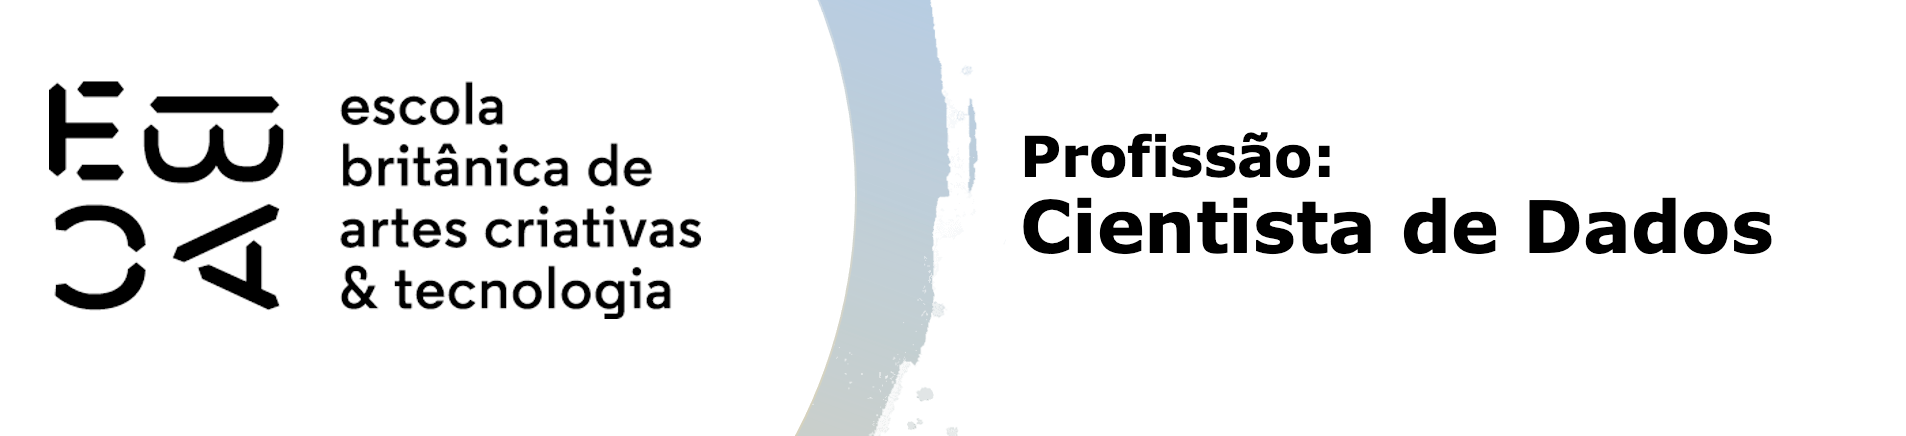

# Tarefa

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelod e previsão de renda que você fez para esta base. 

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado). 

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns

import scipy.stats as ss 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

import patsy
import statsmodels.api as sm

from scipy.interpolate import interp1d
import warnings;   warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('previsao_de_renda_II.csv', index_col=0)
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 2015-01-01 to 2016-03-01
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  750000 non-null  int64  
 1   sexo                   750000 non-null  object 
 2   posse_de_veiculo       750000 non-null  object 
 3   posse_de_imovel        750000 non-null  object 
 4   qtd_filhos             750000 non-null  int64  
 5   tipo_renda             750000 non-null  object 
 6   educacao               750000 non-null  object 
 7   estado_civil           750000 non-null  object 
 8   tipo_residencia        750000 non-null  object 
 9   idade                  750000 non-null  int64  
 10  tempo_emprego          624240 non-null  float64
 11  qt_pessoas_residencia  750000 non-null  float64
 12  renda                  750000 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 80.1+ MB


In [4]:
df.isnull().sum()

index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64

In [5]:
df['tempo_emprego'].fillna(value=df['tempo_emprego'].mean(), inplace=True)

In [6]:
df.isnull().sum()

index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

In [7]:
df_train = df[:'2015-12-01']
df_test = df['2016-01-01':]

# Criando as variáveis log_renda

df_train['log_renda']=np.log(df_train['renda'])
df_test['log_renda']=np.log(df_test['renda'])

In [8]:
X1 = patsy.dmatrices('''log_renda ~ C(posse_de_imovel)
                    + qtd_filhos 
                    + idade
                    + tempo_emprego
                    + 1''', df_train)

res = smf.ols(X1, data=df_train).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.05)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                 1.103e+05
Date:                Sat, 23 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:41:41   Log-Likelihood:            -8.0490e+05
No. Observations:              600000   AIC:                         1.610e+06
Df Residuals:                  599996   BIC:                         1.610e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   8.3826      0.005   1693.373      0.000       8.373       8.392
C(posse_de_imovel)[T.S]     0.1790      0.003     69.703      0.000       0.174       0.184
qtd_filhos                       0          0        nan        nan           0           0
idade                      -0.0056      0.000    -50.285      0.000      -0.006      -0.005
tempo_emprego               0.1317      0.000    650.147      0.000       0.131       0.132
==============================================================================
Omnibus:                      891.428   Durbin-Watson:                   1.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              795.178
Skew:                          -0.048   Prob(JB):                    2.13e-173
Kurtosis:                       2.850   Cond. No.                         218.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
X1 = patsy.dmatrices('''log_renda ~ C(posse_de_imovel)
                    + tempo_emprego
                    + 1''', df_train)

res = smf.ols(X1, data=df_train).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.05)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.456e+05
Date:                Sat, 23 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:41:45   Log-Likelihood:            -8.0617e+05
No. Observations:              600000   AIC:                         1.612e+06
Df Residuals:                  599997   BIC:                         1.612e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   8.1700      0.003   3166.772      0.000       8.165       8.175
C(posse_de_imovel)[T.S]     0.1615      0.003     63.353      0.000       0.157       0.167
tempo_emprego               0.1291      0.000    657.553      0.000       0.129       0.129
==============================================================================
Omnibus:                      863.676   Durbin-Watson:                   1.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              773.991
Skew:                          -0.048   Prob(JB):                    8.51e-169
Kurtosis:                       2.853   Cond. No.                         27.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?
- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios?

Acredito que as propostas foram atendidas,está brm visisel os residuos e comparações


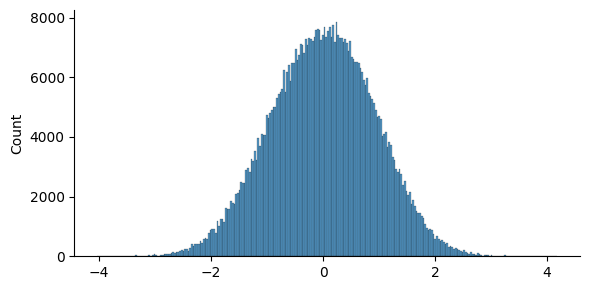

In [10]:
sns.displot(res.resid, height=3, aspect=2);

<Axes: ylabel='log_renda'>

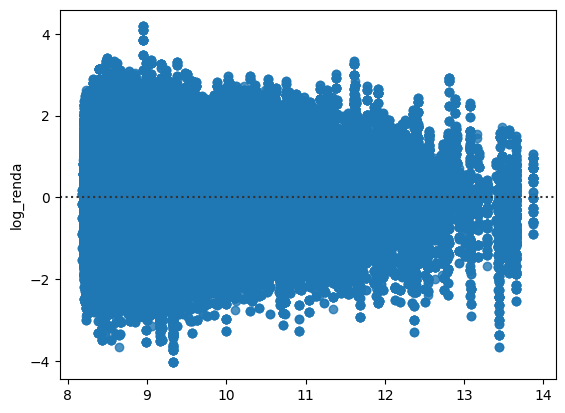

In [11]:

sns.residplot(x=res.predict(), y='log_renda', data=df_train)

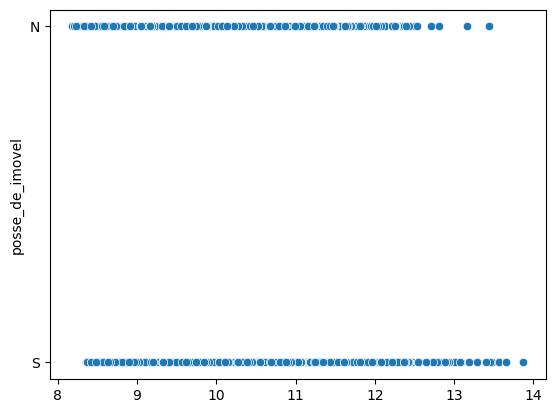

In [12]:
sns.scatterplot(x = res.predict(), y = 'posse_de_imovel', data=df_train);

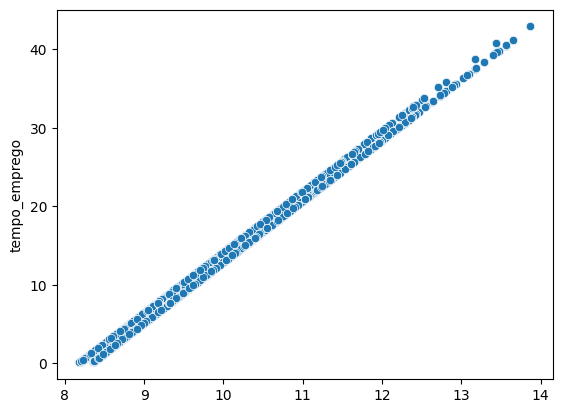

In [13]:
sns.scatterplot(x = res.predict(), y = 'tempo_emprego', data=df_train);

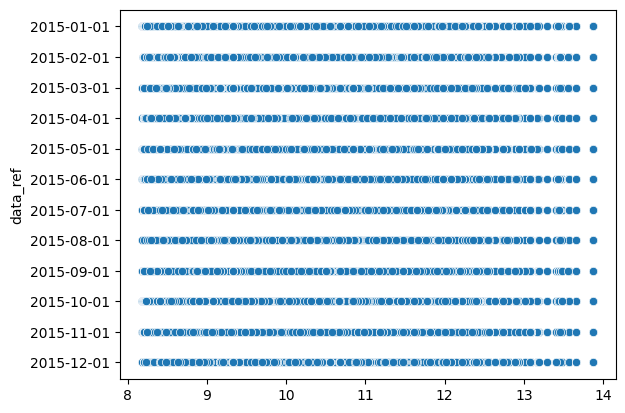

In [14]:
sns.scatterplot(x = res.predict(), y = 'data_ref', data=df_train);

<Axes: >

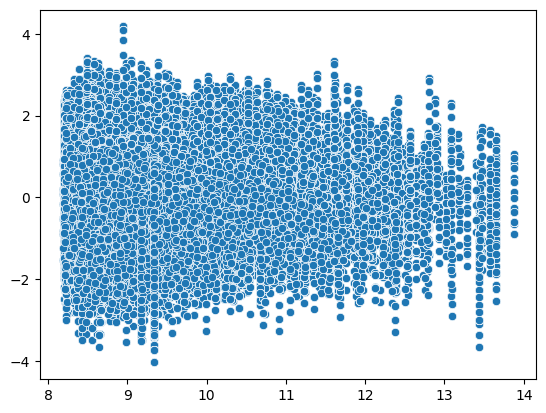

In [15]:
sns.scatterplot(x = res.predict(), y = res.resid)

## Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

In [16]:
df_train_short = df_train[:'2015-02-01']
df_train_short.reset_index(inplace=True)
df_train_short.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   data_ref               100000 non-null  object 
 1   index                  100000 non-null  int64  
 2   sexo                   100000 non-null  object 
 3   posse_de_veiculo       100000 non-null  object 
 4   posse_de_imovel        100000 non-null  object 
 5   qtd_filhos             100000 non-null  int64  
 6   tipo_renda             100000 non-null  object 
 7   educacao               100000 non-null  object 
 8   estado_civil           100000 non-null  object 
 9   tipo_residencia        100000 non-null  object 
 10  idade                  100000 non-null  int64  
 11  tempo_emprego          100000 non-null  float64
 12  qt_pessoas_residencia  100000 non-null  float64
 13  renda                  100000 non-null  float64
 14  log_renda              100000 non-nul

In [17]:
reg = smf.ols('log_renda ~ tempo_emprego', data=df_train_short).fit()

## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
- VIF

In [19]:

df_train_cut = df_train[['posse_de_imovel', 'tempo_emprego', 'log_renda']]

df_train_cut.head(2)

,posse_de_imovel,tempo_emprego,log_renda
data_ref,,,
2015-01-01,N,16.717808,9.318131
2015-01-01,N,9.600000,7.793508


In [ ]:

df_train_cut.corr(method='spearman')

In [21]:
variaveis = ['tempo_emprego', 'posse_de_imovel']

dum = pd.get_dummies(df_train_cut[variaveis], drop_first=True)
dum.head(2)

,tempo_emprego,posse_de_imovel_S
data_ref,,
2015-01-01,16.717808,False
2015-01-01,9.600000,False


In [ ]:
vif(dum.values, 1)

In [ ]:
vars_vif = pd.DataFrame()
vars_vif["VIF Factor"] = [vif(dum, i) for i in range(dum.shape[1])]
vars_vif["Feature"] = dum.columns

vars_vif.round(2)